<a href="https://colab.research.google.com/github/aleeasgar0404/Employee_Attrition_Deep/blob/main/Copy_of_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import tensorflow as tf 
import numpy as np
np.random.seed(42)

In [2]:

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
employee_df=pd.read_csv('/content/drive/MyDrive/Employee_Attrition_data/Employee-Attrition.csv')

In [5]:
employee_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
employee_df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
employee_df['Attrition']=employee_df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['OverTime']=employee_df['OverTime'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['Over18']=employee_df['Over18'].apply(lambda x : 1 if x=='Y' else 0)

**EDA**

In [9]:
employee_df.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

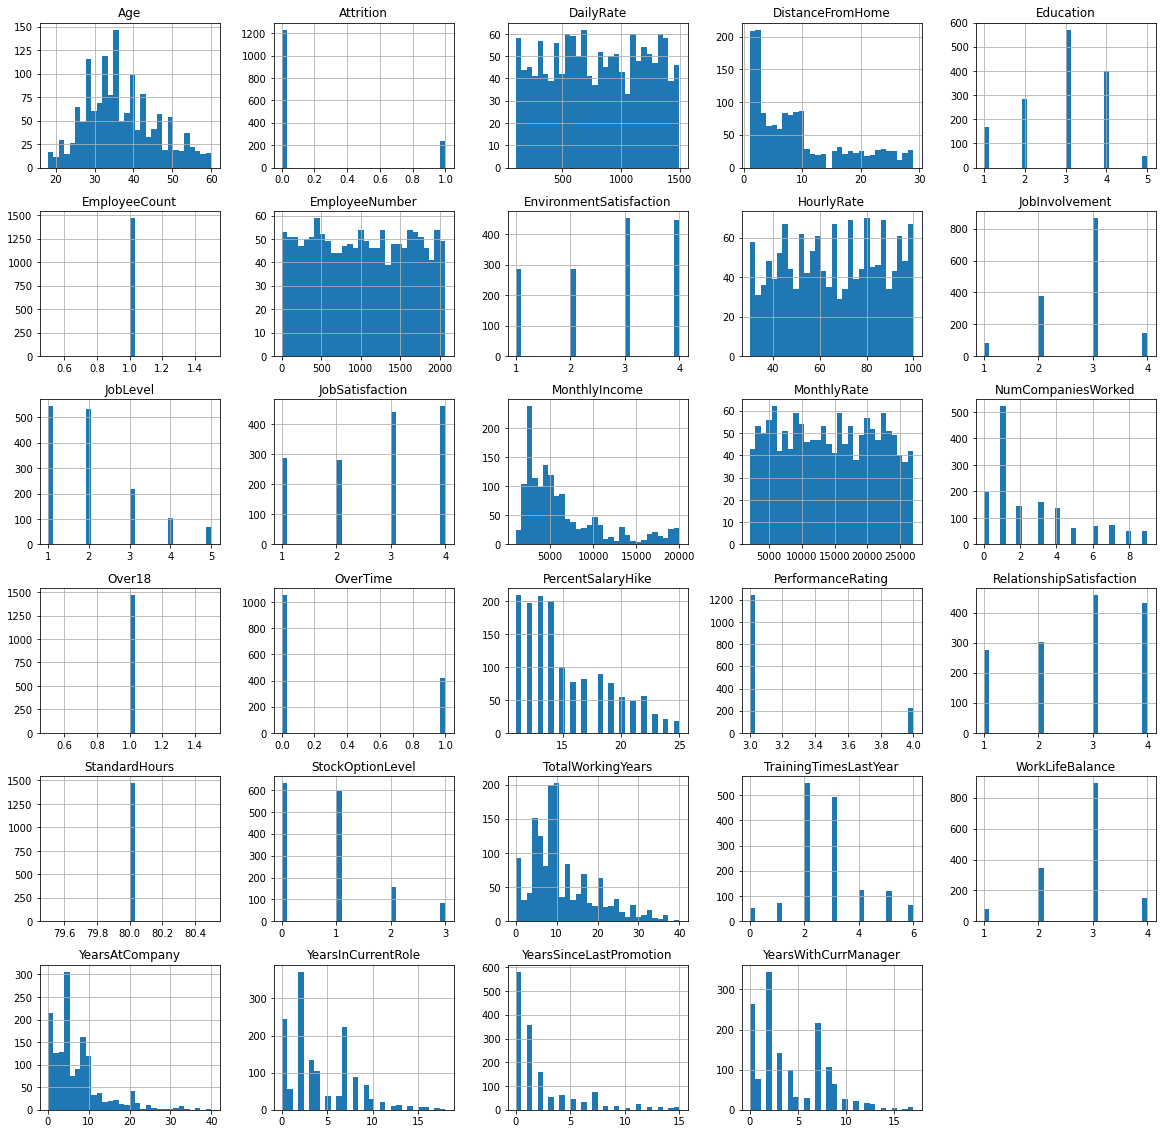

In [10]:
employee_df.hist(bins=30,figsize=(20,20));


Observations :

StandardHours, EmployeeCount, Over18 all take one value.
EmployeeNumber is an ID.
We drop them

In [11]:
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis='columns',inplace=True)


In [12]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [13]:
left_df = employee_df.query('Attrition == 1')
stayed_df = employee_df.query('Attrition == 0')

In [14]:
left_df.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [15]:
stayed_df.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**Correlation Analysis** 



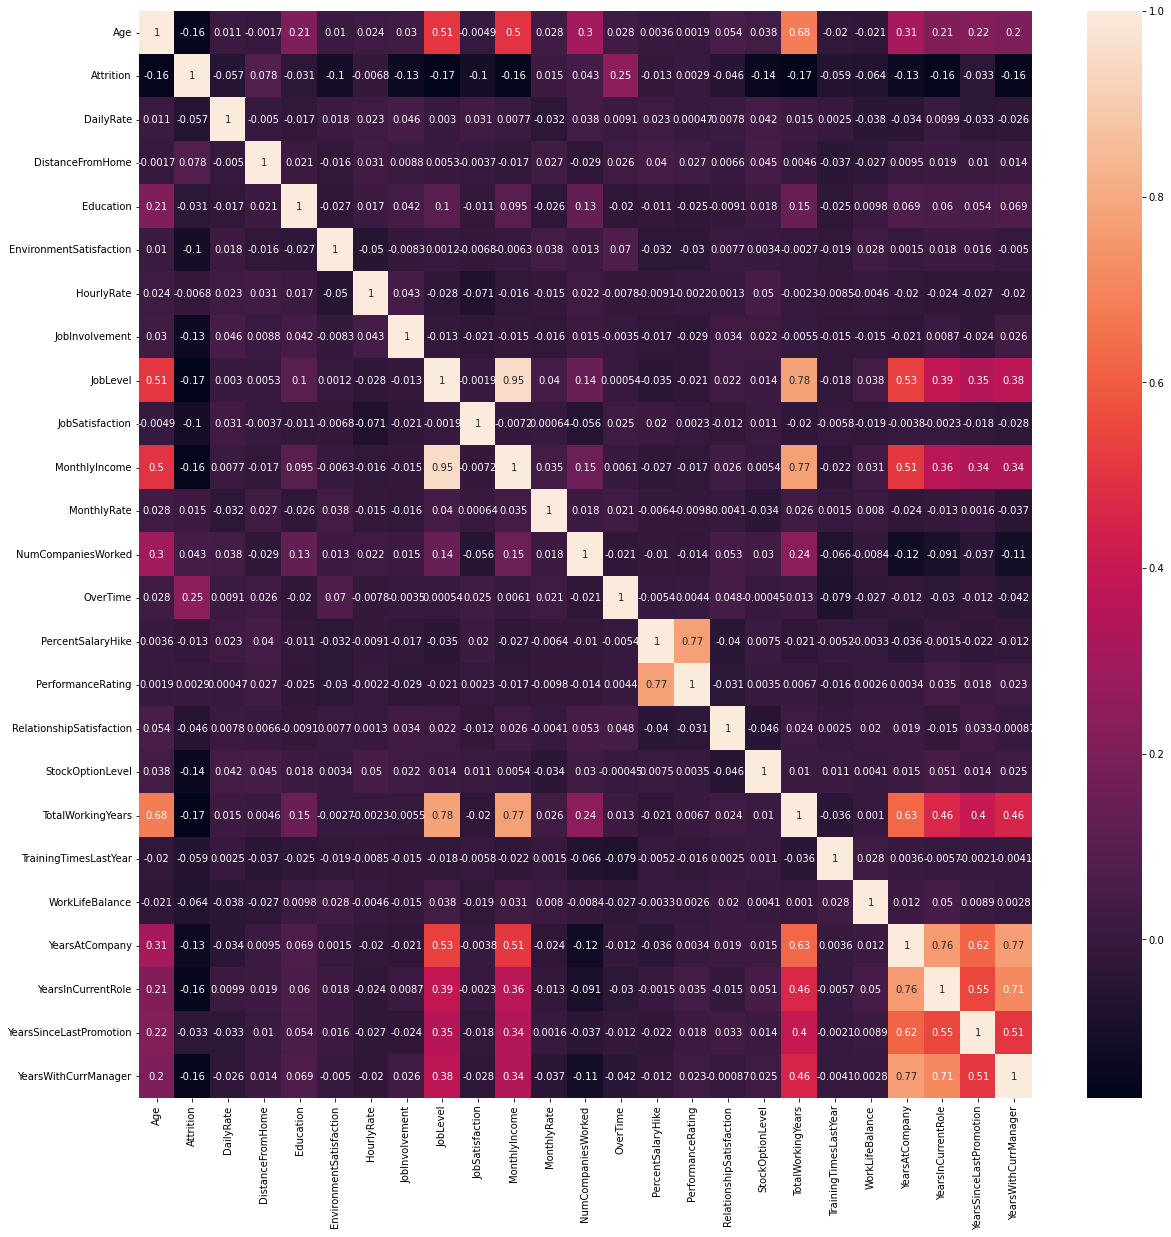

In [16]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(employee_df.corr(),annot=True)

Observations :

The most obvious correlation is the MonthlyIncomeand JobLevel.
MonthlyIncome and ToalWorkingYears are highly correlated as expected.
JobLevel alos is correlated with the TotalWorkingYears
PercentSalaryHike and PerformanceRating are correlated as well,thanks to the performance based reward system put inplace.


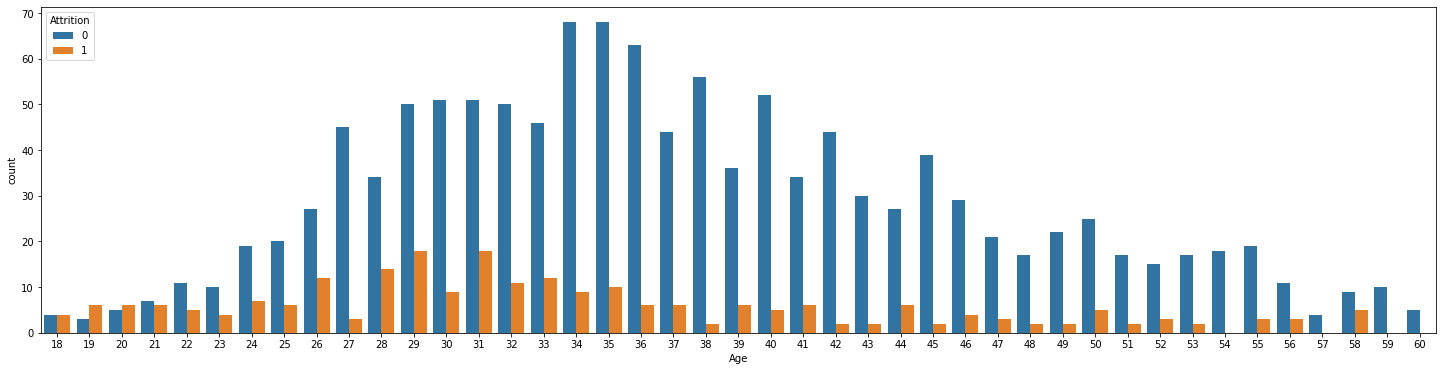

In [17]:
plt.figure(figsize=(25,6))
sns.countplot(x='Age',hue='Attrition',data=employee_df)

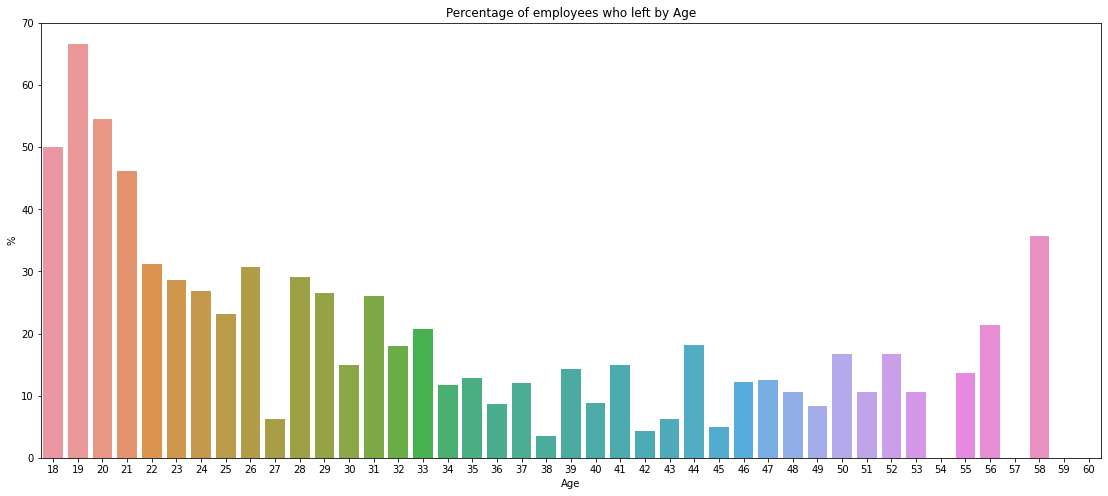

In [18]:
column='Age'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
plt.figure(figsize=(19,8))
sns.barplot(x=column,y='left_percent',data=df)
plt.title(f'Percentage of employees who left by {column}')
plt.ylabel('%');

Observations :

We can see that employees of age less than 22 are the most likely to leave. Why? : 1- They might be just interns or 2- younger people have less financial constraints (debt, family, mortgages...).
Employees are not likely leave at age 27, 54, 42, 45 and 57. Why?

In [19]:
employee_df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

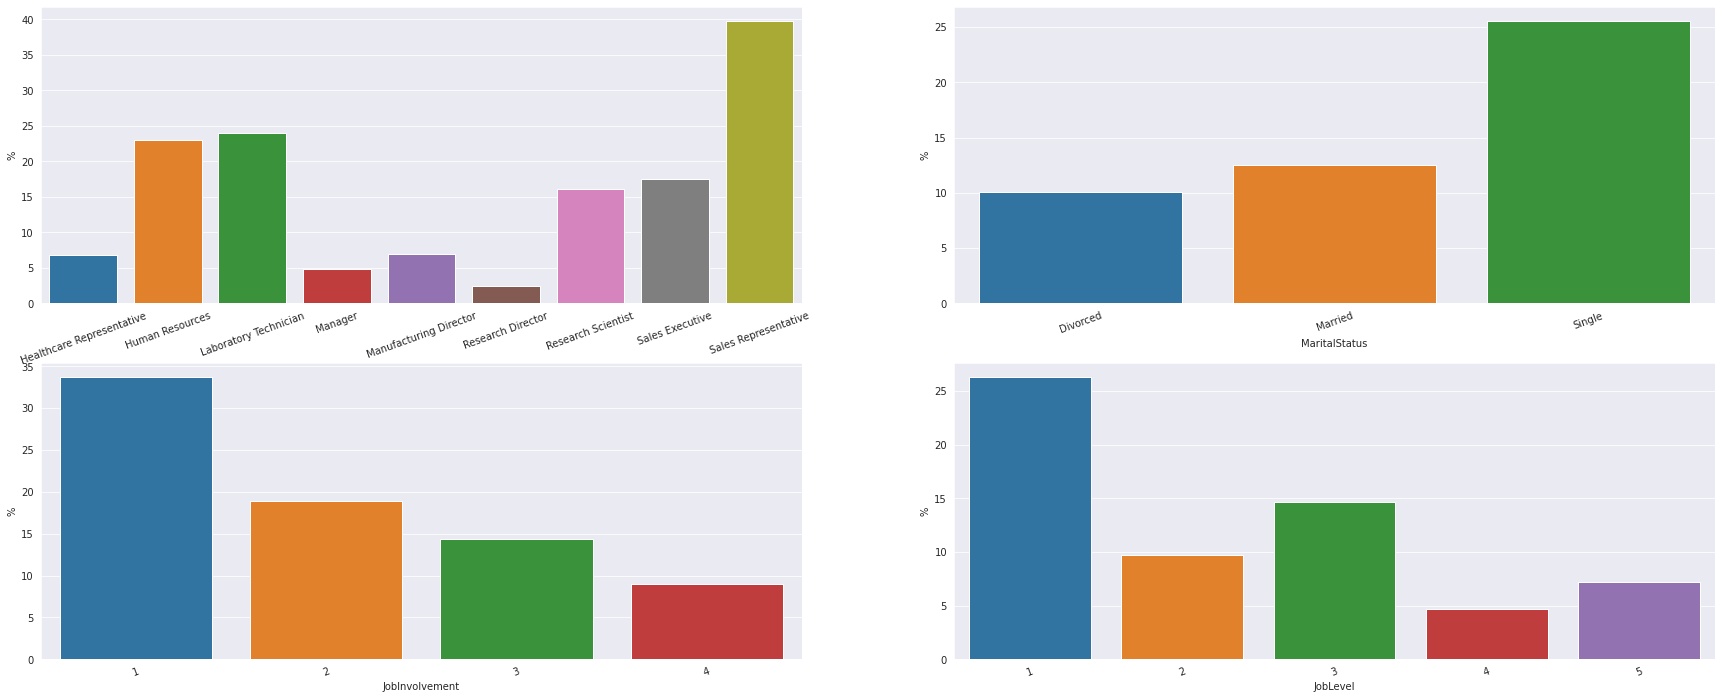

In [20]:
sns.set_style("darkgrid")

fig, axes= plt.subplots(nrows=2,ncols=2,figsize=(30,12))
column='JobRole'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[0,0]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);


column='MaritalStatus'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[0,1]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

column='JobLevel'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[1,1]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

column='JobInvolvement'
df=employee_df.groupby(column)['Attrition'].sum().reset_index().rename(columns={'Attrition':'left'})
sizes=employee_df.groupby(column)['Attrition'].size().reset_index().rename(columns={'Attrition':'size'})
df=pd.merge(df,sizes,on=column)
df['left_percent']=df['left']/df['size']*100
#plt.figure(figsize=(19,8))
ax=axes[1,0]
sns.barplot(ax=ax, x=column,y='left_percent',data=df)
ax.set_ylabel('%')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20);

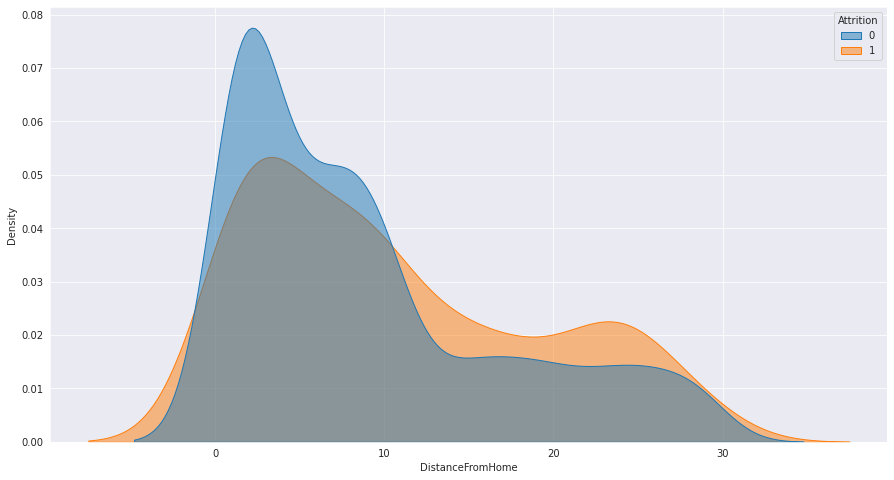

In [21]:
plt.figure(figsize=(15,8))
sns.kdeplot(
   data=employee_df, x="DistanceFromHome", hue="Attrition",
   fill=True, common_norm=False,
   alpha=.5, linewidth=1,
)

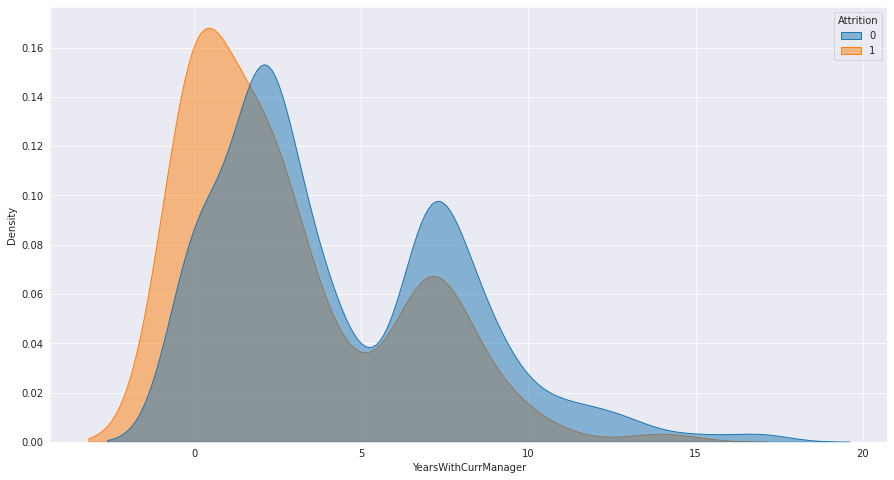

In [22]:
plt.figure(figsize=(15,8))
sns.kdeplot(
   data=employee_df, x="YearsWithCurrManager", hue="Attrition",
   fill=True, common_norm=False,
   alpha=.5, linewidth=1,
)

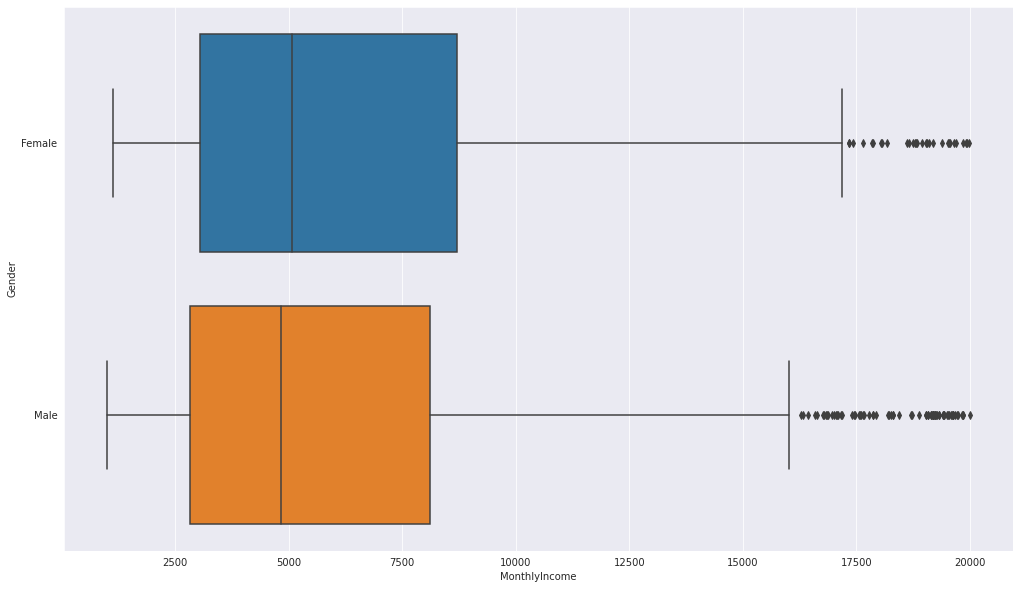

In [23]:
plt.figure(figsize=(17,10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

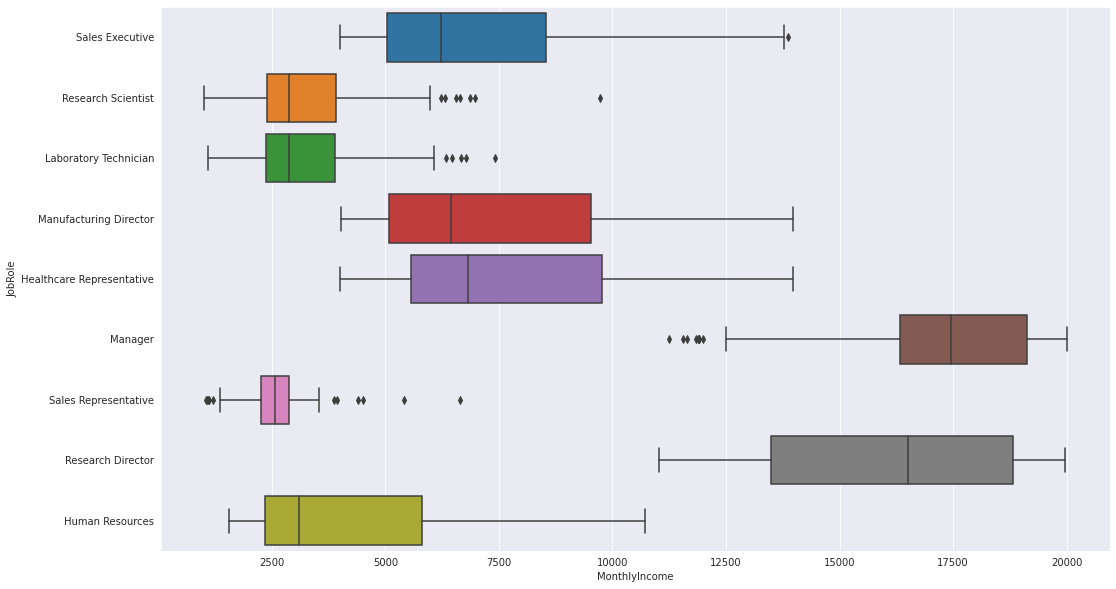

In [24]:
plt.figure(figsize=(17,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

**PreProcessing categorical features **

In [25]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [26]:
categoricals=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

In [27]:
X_cat= employee_df[categoricals]

In [28]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
onehotencoder=OneHotEncoder()
X_cat=onehotencoder.fit_transform(X_cat).toarray() 
X_cat= pd.DataFrame(X_cat)

In [31]:
X_numer=employee_df.drop(categoricals+['Attrition'],axis='columns')

In [32]:
X_all= pd.concat([ X_cat, X_numer],axis=1)

In [ ]:
from collections import Counter
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

Resampled dataset shape Counter({0: 1233, 1: 1160})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_all,employee_df['Attrition'],test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_val= pd.DataFrame(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [36]:
X_train.shape

(1176, 50)

In [37]:
from keras.layers import BatchNormalization
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Dense(units=100,activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Epoch 1/50
5/5 [==============================] - 4s 48ms/step - loss: 0.5104 - accuracy: 0.8180 - val_loss: 0.5340 - val_accuracy: 0.7823
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 0.4447 - accuracy: 0.8478 - val_loss: 0.5540 - val_accuracy: 0.7823
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.4330 - accuracy: 0.8478 - val_loss: 0.5194 - val_accuracy: 0.7823
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3919 - accuracy: 0.8478 - val_loss: 0.4892 - val_accuracy: 0.7823
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.3903 - accuracy: 0.8478 - val_loss: 0.4758 - val_accuracy: 0.7823
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3708 - accuracy: 0.8478 - val_loss: 0.4694 - val_accuracy: 0.7823
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.3592 - accuracy: 0.8486 - val_loss: 0.4711 - val_accuracy: 0.7823
Epoch 8/50
5/5 [===============

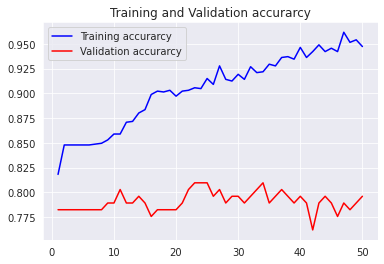

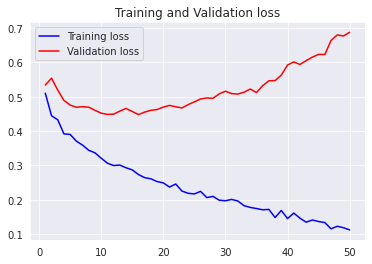

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [40]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c0=classification_report(y_test,y_pred)
print(c0)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       121
           1       0.75      0.46      0.57        26

    accuracy                           0.88       147
   macro avg       0.82      0.71      0.75       147
weighted avg       0.87      0.88      0.87       147



**Class imbalance problem**

**1. Add class weights**

In [41]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.5897693079237714, 1: 3.2849162011173183}

In [42]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val),class_weight=class_weights)

Epoch 1/50
5/5 [==============================] - 3s 102ms/step - loss: 1.1654 - accuracy: 0.4838 - val_loss: 0.8814 - val_accuracy: 0.4830
Epoch 2/50
5/5 [==============================] - 0s 18ms/step - loss: 0.9094 - accuracy: 0.5332 - val_loss: 0.8578 - val_accuracy: 0.5714
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 0.8990 - accuracy: 0.5570 - val_loss: 0.8413 - val_accuracy: 0.5646
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 0.7899 - accuracy: 0.6182 - val_loss: 0.8277 - val_accuracy: 0.5986
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.8036 - accuracy: 0.6259 - val_loss: 0.8182 - val_accuracy: 0.6327
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.7030 - accuracy: 0.6684 - val_loss: 0.8064 - val_accuracy: 0.6599
Epoch 7/50
5/5 [==============================] - 0s 17ms/step - loss: 0.7402 - accuracy: 0.6769 - val_loss: 0.7899 - val_accuracy: 0.6871
Epoch 8/50
5/5 [==========

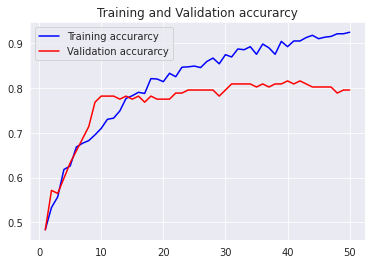

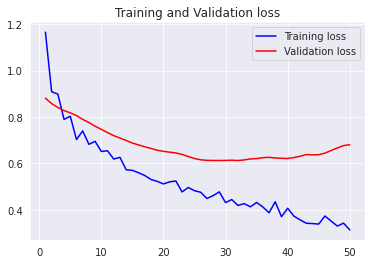

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_242 (Dense)           (None, 20)                1020      
                                                                 
 batch_normalization_48 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 dropout_173 (Dropout)       (None, 20)                0         
                                                                 
 dense_243 (Dense)           (None, 110)               2310      
                                                                 
 batch_normalization_49 (Bat  (None, 110)              440       
 chNormalization)                                                
                                                                 
 dropout_174 (Dropout)       (None, 110)             

In [44]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       121
           1       0.60      0.46      0.52        26

    accuracy                           0.85       147
   macro avg       0.74      0.70      0.72       147
weighted avg       0.84      0.85      0.84       147



**2. SMOTE**

In [45]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

Resampled dataset shape Counter({1: 1233, 0: 1233})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [48]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 0.9592 - accuracy: 0.6050 - val_loss: 0.8324 - val_accuracy: 0.6154
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7136 - accuracy: 0.7490 - val_loss: 0.7809 - val_accuracy: 0.6883
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6366 - accuracy: 0.7784 - val_loss: 0.7336 - val_accuracy: 0.7409
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5859 - accuracy: 0.8159 - val_loss: 0.6963 - val_accuracy: 0.7854
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5549 - accuracy: 0.8337 - val_loss: 0.6594 - val_accuracy: 0.8057
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5307 - accuracy: 0.8372 - val_loss: 0.6279 - val_accuracy: 0.8381
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5057 - accuracy: 0.8560 - val_loss: 0.5984 - val_accuracy: 0.8543
Epoch 8/50
8/8 [=================

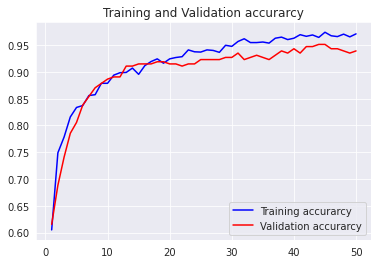

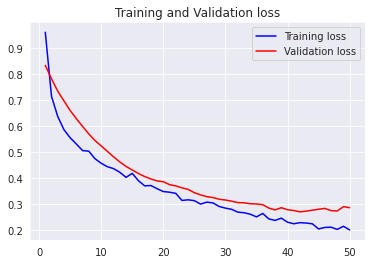

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [50]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       112
           1       0.91      0.93      0.92       135

    accuracy                           0.91       247
   macro avg       0.91      0.90      0.91       247
weighted avg       0.91      0.91      0.91       247



**3. SMOTEN**

In [52]:
from collections import Counter
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 1233, 0: 1233})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Epoch 1/50
8/8 [==============================] - 2s 36ms/step - loss: 0.8347 - accuracy: 0.6780 - val_loss: 0.7603 - val_accuracy: 0.7085
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5597 - accuracy: 0.8499 - val_loss: 0.6963 - val_accuracy: 0.7895
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5213 - accuracy: 0.8676 - val_loss: 0.6484 - val_accuracy: 0.8502
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.4945 - accuracy: 0.8874 - val_loss: 0.6142 - val_accuracy: 0.8623
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.4504 - accuracy: 0.8966 - val_loss: 0.5869 - val_accuracy: 0.8745
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4408 - accuracy: 0.9016 - val_loss: 0.5586 - val_accuracy: 0.8785
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4210 - accuracy: 0.9108 - val_loss: 0.5327 - val_accuracy: 0.8866
Epoch 8/50
8/8 [==============

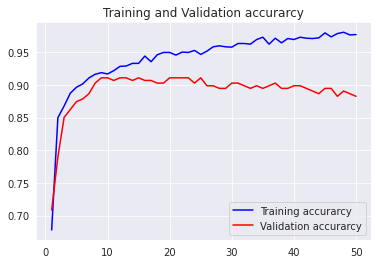

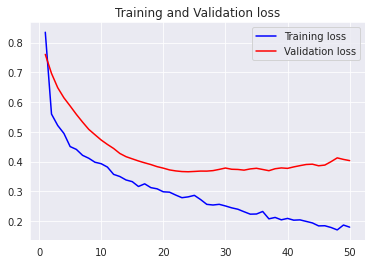

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [54]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       129
           1       0.92      0.91      0.91       118

    accuracy                           0.92       247
   macro avg       0.92      0.92      0.92       247
weighted avg       0.92      0.92      0.92       247



**3. ADASYN**

In [55]:
from collections import Counter
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({0: 1233, 1: 1160})
Epoch 1/50
8/8 [==============================] - 2s 52ms/step - loss: 0.8884 - accuracy: 0.6306 - val_loss: 0.7922 - val_accuracy: 0.6402
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7064 - accuracy: 0.7450 - val_loss: 0.7562 - val_accuracy: 0.6820
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6595 - accuracy: 0.7832 - val_loss: 0.7241 - val_accuracy: 0.7155
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5893 - accuracy: 0.8218 - val_loss: 0.6963 - val_accuracy: 0.7573
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5673 - accuracy: 0.8271 - val_loss: 0.6666 - val_accuracy: 0.7992
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5090 - accuracy: 0.8600 - val_loss: 0.6331 - val_accuracy: 0.8201
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4918 - accuracy: 0.8605 - val_loss: 0.6019 - 

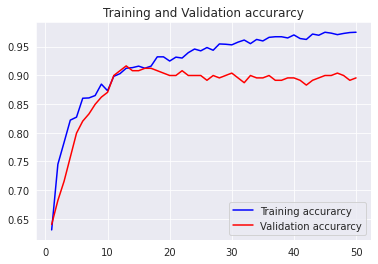

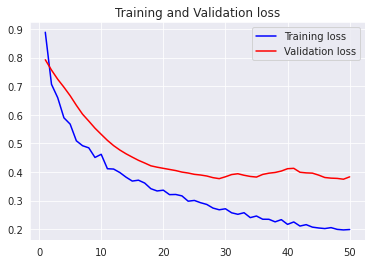

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [57]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       123
           1       0.88      0.97      0.92       117

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.93      0.92      0.92       240



**4. Borderline smote**

In [58]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 1233, 0: 1233})
Epoch 1/50
8/8 [==============================] - 2s 39ms/step - loss: 1.0612 - accuracy: 0.5583 - val_loss: 0.8148 - val_accuracy: 0.7409
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.7134 - accuracy: 0.7637 - val_loss: 0.7717 - val_accuracy: 0.6842
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6292 - accuracy: 0.7926 - val_loss: 0.7457 - val_accuracy: 0.6883
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5928 - accuracy: 0.8230 - val_loss: 0.7182 - val_accuracy: 0.7247
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5584 - accuracy: 0.8316 - val_loss: 0.6923 - val_accuracy: 0.7611
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5280 - accuracy: 0.8504 - val_loss: 0.6653 - val_accuracy: 0.7895
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5011 - accuracy: 0.8737 - val_loss: 0.6397 - 

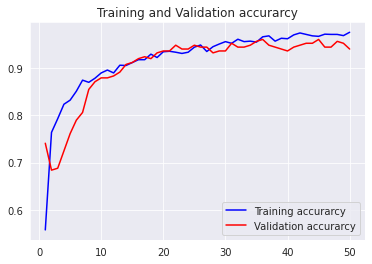

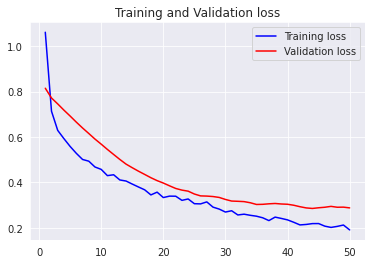

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [60]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       131
           1       0.91      1.00      0.95       116

    accuracy                           0.95       247
   macro avg       0.95      0.95      0.95       247
weighted avg       0.96      0.95      0.95       247



**5. SVMSMOTE**

In [61]:
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 1233, 0: 1233})
Epoch 1/50
8/8 [==============================] - 3s 92ms/step - loss: 1.0179 - accuracy: 0.5781 - val_loss: 0.7805 - val_accuracy: 0.7409
Epoch 2/50
8/8 [==============================] - 0s 19ms/step - loss: 0.7282 - accuracy: 0.7363 - val_loss: 0.7244 - val_accuracy: 0.7571
Epoch 3/50
8/8 [==============================] - 0s 21ms/step - loss: 0.6337 - accuracy: 0.7911 - val_loss: 0.6914 - val_accuracy: 0.7611
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.5907 - accuracy: 0.8124 - val_loss: 0.6634 - val_accuracy: 0.7935
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 0.5400 - accuracy: 0.8458 - val_loss: 0.6418 - val_accuracy: 0.7773
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.4965 - accuracy: 0.8682 - val_loss: 0.6198 - val_accuracy: 0.7895
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.4977 - accuracy: 0.8641 - val_loss: 0.598

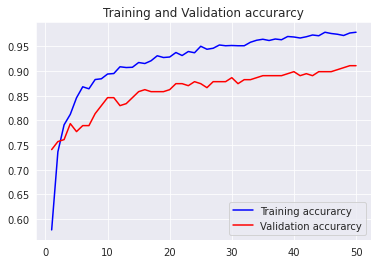

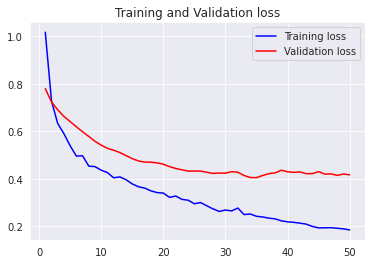

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [63]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       122
           1       0.85      0.94      0.89       125

    accuracy                           0.88       247
   macro avg       0.89      0.88      0.88       247
weighted avg       0.89      0.88      0.88       247



In [67]:
from collections import Counter
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 841, 0: 627})
Epoch 1/50
5/5 [==============================] - 2s 157ms/step - loss: 0.8767 - accuracy: 0.6380 - val_loss: 0.8444 - val_accuracy: 0.5782
Epoch 2/50
5/5 [==============================] - 0s 39ms/step - loss: 0.7213 - accuracy: 0.7487 - val_loss: 0.8102 - val_accuracy: 0.6395
Epoch 3/50
5/5 [==============================] - 0s 25ms/step - loss: 0.6296 - accuracy: 0.8092 - val_loss: 0.7756 - val_accuracy: 0.7211
Epoch 4/50
5/5 [==============================] - 0s 27ms/step - loss: 0.5916 - accuracy: 0.8237 - val_loss: 0.7461 - val_accuracy: 0.7687
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 0.5532 - accuracy: 0.8484 - val_loss: 0.7187 - val_accuracy: 0.7959
Epoch 6/50
5/5 [==============================] - 0s 27ms/step - loss: 0.5353 - accuracy: 0.8416 - val_loss: 0.6919 - val_accuracy: 0.8095
Epoch 7/50
5/5 [==============================] - 0s 29ms/step - loss: 0.5012 - accuracy: 0.8654 - val_loss: 0.6674

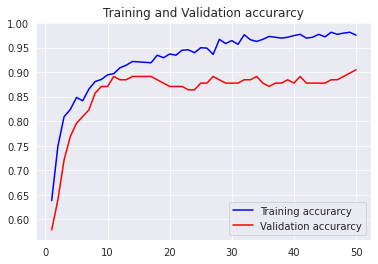

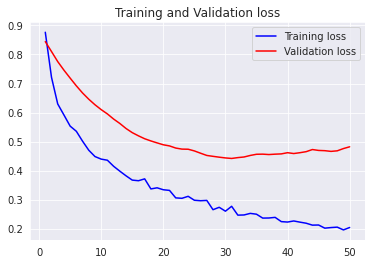

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [69]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87        62
           1       0.87      0.99      0.92        85

    accuracy                           0.90       147
   macro avg       0.92      0.89      0.90       147
weighted avg       0.91      0.90      0.90       147



In [70]:
from collections import Counter
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 1162, 0: 1162})
Epoch 1/50
8/8 [==============================] - 3s 108ms/step - loss: 0.9988 - accuracy: 0.5675 - val_loss: 0.7987 - val_accuracy: 0.7328
Epoch 2/50
8/8 [==============================] - 0s 19ms/step - loss: 0.7410 - accuracy: 0.7240 - val_loss: 0.7652 - val_accuracy: 0.7500
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.6399 - accuracy: 0.7886 - val_loss: 0.7403 - val_accuracy: 0.7500
Epoch 4/50
8/8 [==============================] - 0s 23ms/step - loss: 0.5924 - accuracy: 0.8090 - val_loss: 0.7148 - val_accuracy: 0.7716
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.5680 - accuracy: 0.8252 - val_loss: 0.6916 - val_accuracy: 0.8103
Epoch 6/50
8/8 [==============================] - 0s 21ms/step - loss: 0.5244 - accuracy: 0.8505 - val_loss: 0.6628 - val_accuracy: 0.8276
Epoch 7/50
8/8 [==============================] - 0s 18ms/step - loss: 0.5250 - accuracy: 0.8451 - val_loss: 0.63

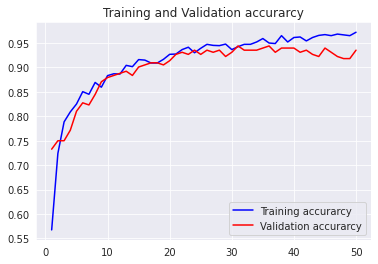

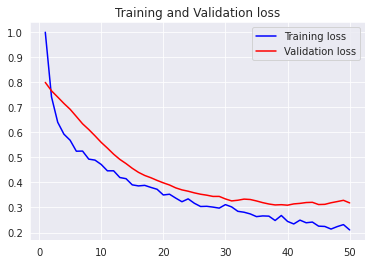

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [72]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       119
           1       0.89      0.92      0.91       114

    accuracy                           0.91       233
   macro avg       0.91      0.91      0.91       233
weighted avg       0.91      0.91      0.91       233



In [ ]:
from imblearn.ensemble import RUSBoostClassifier
clf = RUSBoostClassifier( random_state=0)
clf.fit(X_train, y_train)

RUSBoostClassifier(random_state=0)

In [ ]:
y_pred= clf.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       156
           1       0.30      0.61      0.40        28

    accuracy                           0.73       184
   macro avg       0.61      0.68      0.61       184
weighted avg       0.82      0.73      0.76       184



In [73]:
initial_bias = np.log([0.58/3.28])
output_bias = tf.keras.initializers.Constant(initial_bias)

In [91]:
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',bias_initializer=output_bias))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=100,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 1233, 0: 1233})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Epoch 1/100
8/8 [==============================] - 3s 60ms/step - loss: 1.2279 - accuracy: 0.5304 - val_loss: 1.1805 - val_accuracy: 0.4534
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.9810 - accuracy: 0.6369 - val_loss: 1.0540 - val_accuracy: 0.4575
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 0.8319 - accuracy: 0.7165 - val_loss: 0.9426 - val_accuracy: 0.4737
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 0.7443 - accuracy: 0.7520 - val_loss: 0.8439 - val_accuracy: 0.5587
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7044 - accuracy: 0.7911 - val_loss: 0.7620 - val_accuracy: 0.6518
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6393 - accuracy: 0.8169 - val_loss: 0.7003 - val_accuracy: 0.7287
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5951 - accuracy: 0.8291 - val_loss: 0.6508 - val_accuracy: 0.8057
Epoch 8/100
8/8 [===

In [92]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       123
           1       0.96      0.96      0.96       124

    accuracy                           0.96       247
   macro avg       0.96      0.96      0.96       247
weighted avg       0.96      0.96      0.96       247



In [77]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',bias_initializer=output_bias))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 1233, 0: 1233})
Epoch 1/50
8/8 [==============================] - 3s 82ms/step - loss: 1.1045 - accuracy: 0.5568 - val_loss: 1.3540 - val_accuracy: 0.5344
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.8224 - accuracy: 0.7201 - val_loss: 1.3090 - val_accuracy: 0.5344
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.6967 - accuracy: 0.7885 - val_loss: 1.2035 - val_accuracy: 0.5344
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.6454 - accuracy: 0.8276 - val_loss: 1.0839 - val_accuracy: 0.5344
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.5749 - accuracy: 0.8301 - val_loss: 0.9762 - val_accuracy: 0.5344
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.5561 - accuracy: 0.8565 - val_loss: 0.8834 - val_accuracy: 0.5547
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4989 - accuracy: 0.8687 - val_loss: 0.802

In [78]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       122
           1       0.88      0.98      0.93       125

    accuracy                           0.93       247
   macro avg       0.93      0.93      0.93       247
weighted avg       0.93      0.93      0.93       247



In [79]:
from collections import Counter
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',bias_initializer=output_bias))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({1: 1233, 0: 1233})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Epoch 1/50
8/8 [==============================] - 2s 39ms/step - loss: 1.0246 - accuracy: 0.5948 - val_loss: 1.3448 - val_accuracy: 0.4332
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.6845 - accuracy: 0.8205 - val_loss: 1.2248 - val_accuracy: 0.4332
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5497 - accuracy: 0.8788 - val_loss: 1.0838 - val_accuracy: 0.4332
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.5170 - accuracy: 0.8915 - val_loss: 0.9621 - val_accuracy: 0.4494
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.4994 - accuracy: 0.8966 - val_loss: 0.8626 - val_accuracy: 0.5304
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.4571 - accuracy: 0.9102 - val_loss: 0.7871 - val_accuracy: 0.6680
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4380 - accuracy: 0.9118 - val_loss: 0.7248 - val_accuracy: 0.7490
Epoch 8/50
8/8 [===========

In [80]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       123
           1       0.92      0.89      0.90       124

    accuracy                           0.90       247
   macro avg       0.90      0.90      0.90       247
weighted avg       0.90      0.90      0.90       247



In [82]:
from collections import Counter
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_all,employee_df['Attrition'])
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_res = scaler.fit_transform(X_res)

X_res=pd.DataFrame(X_res)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size= 0.20)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size= 0.5)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(50,)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100,activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3),
))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',bias_initializer=output_bias))

model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=50,verbose=1, batch_size=256
                ,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Resampled dataset shape Counter({0: 1233, 1: 1160})
Epoch 1/50
8/8 [==============================] - 2s 37ms/step - loss: 1.1801 - accuracy: 0.5580 - val_loss: 1.2174 - val_accuracy: 0.4979
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.8394 - accuracy: 0.7189 - val_loss: 1.1743 - val_accuracy: 0.4979
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7324 - accuracy: 0.7680 - val_loss: 1.0850 - val_accuracy: 0.4979
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.7994 - val_loss: 0.9920 - val_accuracy: 0.5021
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6029 - accuracy: 0.8370 - val_loss: 0.9016 - val_accuracy: 0.5146
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5697 - accuracy: 0.8459 - val_loss: 0.8257 - val_accuracy: 0.5732
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5511 - accuracy: 0.8480 - val_loss: 0.7641 - va

In [83]:
y_pred= model.predict(X_test)
y_pred=y_pred>0.5
c1=classification_report(y_test,y_pred)
print(c1)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       127
           1       0.87      0.96      0.91       113

    accuracy                           0.91       240
   macro avg       0.91      0.92      0.91       240
weighted avg       0.92      0.91      0.91       240

